# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
response_data = requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD")
response_data_2 = requests.get("https://api.alternative.me/v2/ticker/Ethereum/?convert=USD")
response_data_2

<Response [200]>

In [6]:
data = response_data.json()
data_2 = response_data_2.json()
print(data_2)

{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 116059960, 'total_supply': 116059960, 'max_supply': 0, 'quotes': {'USD': {'price': 2558.91, 'volume_24h': 47375139019, 'market_cap': 298092207712, 'percentage_change_1h': -1.18765754583806, 'percentage_change_24h': -9.82069912522024, 'percentage_change_7d': -7.89572750287536, 'percent_change_1h': -1.18765754583806, 'percent_change_24h': -9.82069912522024, 'percent_change_7d': -7.89572750287536}}, 'last_updated': 1622214761}}, 'metadata': {'timestamp': 1622214761, 'num_cryptocurrencies': 1298, 'error': None}}


In [7]:
print(json.dumps(data_2, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 116059960,
            "total_supply": 116059960,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 2558.91,
                    "volume_24h": 47375139019,
                    "market_cap": 298092207712,
                    "percentage_change_1h": -1.18765754583806,
                    "percentage_change_24h": -9.82069912522024,
                    "percentage_change_7d": -7.89572750287536,
                    "percent_change_1h": -1.18765754583806,
                    "percent_change_24h": -9.82069912522024,
                    "percent_change_7d": -7.89572750287536
                }
            },
            "last_updated": 1622214761
        }
    },
    "metadata": {
        "timestamp": 1622214761,
        "num_

In [8]:
btc_price = data["data"]["1"]["quotes"]["USD"]["price"]
btc_price

36638.0

In [9]:
eth_price = data_2["data"]["1027"]["quotes"]["USD"]["price"]
eth_price

2558.91

In [10]:
# Fetch current BTC price
btc_price = data["data"]["1"]["quotes"]["USD"]["price"]


# Fetch current ETH price
eth_price = data_2["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43965.60
The current value of your 5.3 ETH is $13562.22


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [12]:
alpaca_api_key = 'PKFQ2DS83YK1QZNOV061'
alpaca_secret_key = 'dtM5C5iTBUqUxk6heOWqTqZi1oabhkJxryBIlszT'

In [13]:
type(alpaca_secret_key)

str

In [14]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [15]:
type(alpaca_secret_key)

NoneType

In [34]:
# Set Alpaca API key and secret
alpaca_api_key = 'PKFQ2DS83YK1QZNOV061'
alpaca_secret_key = 'dtM5C5iTBUqUxk6heOWqTqZi1oabhkJxryBIlszT'
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [35]:
# Format current date as ISO format
today = pd.Timestamp("2021-05-26", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Preview DataFrame
df_portfolio

AGG                                     SPY  \
                             open   high     low   close   volume    open   
time                                                                        
2021-05-26 00:00:00-04:00  114.13  114.8  114.13  114.69  3377324  418.87   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-26 00:00:00-04:00  419.61  417.76  419.04  38369865

In [36]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.69
Current SPY closing price: $419.04


In [37]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20952.00
The current value of your 200 AGG shares is $22938.00


### Savings Health Analysis

In [38]:
# Set monthly household income
monthly_income = 12000
# Create savings DataFrame
total_crypto = my_eth_value + my_btc_value
total_shares = my_agg_value + my_spy_value
data = [[total_crypto], [total_shares]]
df_savings = pd.DataFrame(data, columns = ['amount'], index = ['crypto', 'shares'])
# Display savings DataFrame
display(df_savings)

amount
crypto  57527.823
shares  43890.000

array([<AxesSubplot:ylabel='amount'>], dtype=object)

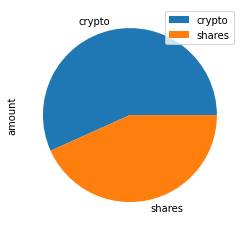

In [39]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True)

In [40]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
total_savings = total_crypto + total_shares    
# Calculate total amount of savings
if total_savings > emergency_fund :
    print ("Congratulations you have enough money in your emergency fund!")
if total_savings >= emergency_fund :
    print ("Congratulations you have reached your financial goal!")
# Validate saving health
if total_savings < emergency_fund:
    print(f"You are {total_savings - emergency_fund} away from reaching your goal" )
# YOUR CODE HERE!

Congratulations you have enough money in your emergency fund!
Congratulations you have reached your financial goal!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [41]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-26', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-26', tz='America/New_York').isoformat()

In [47]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df
# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-06-06 00:00:00-04:00  109.87  109.9500  109.8100  109.870  1434088.0   
2017-06-07 00:00:00-04:00  109.81  109.8700  109.7000  109.730  1570692.0   
2017-06-08 00:00:00-04:00  109.70  109.7000  109.5101  109.650  1243191.0   
2017-06-09 00:00:00-04:00  109.51  109.6300  109.4600  109.560  1356020.0   
2017-06-12 00:00:00-04:00  109.51  109.6958  109.4700  109.555  1184601.0   

                              SPY                                       
                             open    high     low   close       volume  
time                                                                    
2017-06-06 00:00:00-04:00     NaN     NaN     NaN     NaN          NaN  
2017-06-07 00:00:00-04:00  243.60  243.92  242.83  243.65   38602639.0  
2017-06-08 00:00:00-04:00  243.77  244.33  243.17  243.76   48051333.0  
2017-06-09 00:00:00-04:00  244.09  245.01  241.95  243.45  103578275.0  
2017-06-12 00:00:00-04:00  243.14  243.42  242.38  243.34   57096569.0

In [48]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [49]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-06-06 00:00:00-04:00  109.87  109.9500  109.8100  109.870  1434088.0   
2017-06-07 00:00:00-04:00  109.81  109.8700  109.7000  109.730  1570692.0   
2017-06-08 00:00:00-04:00  109.70  109.7000  109.5101  109.650  1243191.0   
2017-06-09 00:00:00-04:00  109.51  109.6300  109.4600  109.560  1356020.0   
2017-06-12 00:00:00-04:00  109.51  109.6958  109.4700  109.555  1184601.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-06-06 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-06-07 00:00:00-04:00    -0.001274  243.60  243.92  242.83  243.65   
2017-06-08 00:00:00-04:00    -0.000729  243.77  244.33  243.17  243.76   
2017-06-09 00:00:00-04:00    -0.000821  244.09  245.01  241.95  243.45   
2017-06-12 00:00:00-04:00    -0.000046  243.14  243.42  242.38  243.34   

                                                     
                                volume daily_return  
time                                                 
2017-06-06 00:00:00-04:00          NaN          NaN  
2017-06-07 00:00:00-04:00   38602639.0          NaN  
2017-06-08 00:00:00-04:00   48051333.0     0.000451  
2017-06-09 00:00:00-04:00  103578275.0    -0.001272  
2017-06-12 00:00:00-04:00   57096569.0    -0.000452

In [50]:
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1         2          3         4         5    \
0      1.000000   1.000000  1.000000   1.000000  1.000000  1.000000   
1      1.005655   0.998773  0.988413   0.998716  0.995576  0.994255   
2      1.015510   1.015453  0.992778   1.000802  0.994841  0.995286   
3      1.012518   1.021876  0.997967   1.005824  0.992166  1.001364   
4      1.012179   1.019871  1.006729   0.999374  0.993052  0.996035   
...         ...        ...       ...        ...       ...       ...   
7556  17.129153  13.720988  6.260400  10.354043  5.739237  6.182443   
7557  16.873876  13.690913  6.248584  10.394983  5.744674  6.144301   
7558  16.818509  13.678569  6.274443  10.281212  5.753614  6.179076   
7559  16.753572  13.579057  6.277197  10.221175  5.773041  6.152270   
7560  16.763976  13.594326  6.304395  10.271325  5.827492  6.107344   

            6         7          8         9    ...       490       491  \
0      1.000000  1.000000   1.000000  1.000000  ...  1.000000  1.000000   
1      0.998518  0.990138   0.987947  0.997874  ...  1.002092  0.997012   
2      1.005619  0.990386   0.983012  1.001652  ...  1.009164  1.001942   
3      1.007753  0.999327   0.992665  1.004451  ...  1.013977  1.006569   
4      1.008654  0.998202   1.005561  1.000409  ...  1.008655  1.006975   
...         ...       ...        ...       ...  ...       ...       ...   
7556   9.795629  8.286006  11.743701  4.583550  ...  8.566284  9.196884   
7557   9.777182  8.266055  11.688109  4.614062  ...  8.577545  9.317984   
7558   9.946821  8.330484  11.654183  4.626926  ...  8.623337  9.309373   
7559  10.050657  8.335158  11.710792  4.630039  ...  8.544327  9.269350   
7560  10.006067  8.406658  11.708751  4.618835  ...  8.560977  9.250506   

           492        493        494       495       496       497       498  \
0     1.000000   1.000000   1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.002116   0.993009   1.007742  0.994031  0.995394  0.998220  1.002092   
2     1.007520   0.987421   1.003617  0.993440  1.000150  0.995996  1.009295   
3     1.016506   0.996642   1.009318  0.998281  1.004499  1.002074  1.013498   
4     1.024189   0.991521   1.011156  1.002113  1.003531  1.002487  1.010211   
...        ...        ...        ...       ...       ...       ...       ...   
7556  7.723289  19.416890  10.317257  4.680467  3.815166  7.247292  8.014835   
7557  7.734540  19.518377  10.263161  4.662721  3.857416  7.250890  8.031684   
7558  7.743996  19.519972  10.295330  4.643937  3.869952  7.313175  8.028928   
7559  7.648095  19.662861  10.318183  4.637551  3.842497  7.252723  8.134948   
7560  7.607323  19.804688  10.238284  4.613307  3.865498  7.286935  8.202113   

           499  
0     1.000000  
1     0.992281  
2     0.989454  
3     0.988755  
4     0.987495  
...        ...  
7556  3.557644  
7557  3.564193  
7558  3.560137  
7559  3.560200  
7560  3.572888  

[7561 rows x 500 columns]

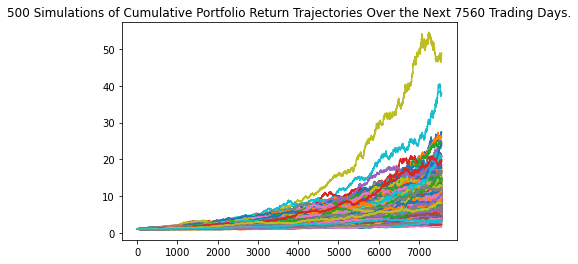

In [53]:
line_plot =MC_30_year.plot_simulation()

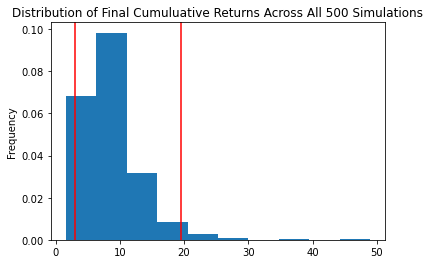

In [54]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()

### Retirement Analysis

In [55]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              8.695222
std               4.572818
min               1.587689
25%               5.825849
50%               7.816862
75%              10.368072
max              48.960842
95% CI Lower      3.083172
95% CI Upper     19.458769
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [56]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $61663.43 and $389175.39


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [57]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $92495.15 and $583763.08


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [51]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.90,.10],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [52]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.002190  0.994301  1.003418  1.004160  0.997712  1.000287  0.994902   
2     1.008562  0.986795  1.003784  1.001639  1.001712  1.001452  1.000564   
3     1.011006  0.985971  1.008016  1.003198  0.999577  1.006973  1.000316   
4     1.011406  0.988015  1.008352  1.000278  1.001804  1.007723  0.998637   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.104673  0.998372  1.444195  1.005998  1.226196  1.264812  1.145992   
1257  1.107744  1.001678  1.443441  1.004093  1.233475  1.270108  1.144531   
1258  1.109118  1.001777  1.443200  1.004125  1.231100  1.262554  1.143783   
1259  1.115218  0.998646  1.439295  0.998162  1.231255  1.267955  1.147108   
1260  1.112223  1.001779  1.436632  0.997849  1.240398  1.265925  1.147532   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.998547  1.004358  0.999071  ...  0.995941  0.999301  0.996913   
2     0.998455  1.003708  1.000967  ...  1.001475  0.997441  0.998633   
3     0.999185  1.004277  1.003022  ...  1.000790  1.000819  0.996252   
4     1.000338  1.003196  0.999384  ...  1.001483  0.998805  0.994852   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.440510  1.057361  1.132640  ...  1.017415  1.032923  1.146724   
1257  1.440759  1.055693  1.131659  ...  1.015912  1.034965  1.142376   
1258  1.443842  1.056578  1.126519  ...  1.018093  1.040266  1.147283   
1259  1.445305  1.051138  1.125702  ...  1.012109  1.038723  1.147175   
1260  1.447167  1.048554  1.129357  ...  1.015834  1.041717  1.150275   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.997011  1.003116  0.997212  0.995940  0.998896  0.999509  1.001350  
2     1.000801  0.999697  0.994854  0.998452  0.999883  0.998929  0.996011  
3     0.993526  0.997889  0.993196  0.994423  1.002364  1.001828  0.997668  
4     0.995422  0.994362  0.992959  0.997387  1.003779  1.000294  0.998391  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.183032  1.021844  1.300962  1.089730  1.016522  0.967415  1.184190  
1257  1.180876  1.024531  1.303123  1.089968  1.015640  0.968037  1.181294  
1258  1.182026  1.028567  1.299406  1.092717  1.010654  0.970736  1.183081  
1259  1.177764  1.029937  1.301674  1.085239  1.011093  0.962522  1.181861  
1260  1.177430  1.028507  1.303981  1.091363  1.012401  0.960952  1.176285  

[1261 rows x 500 columns]

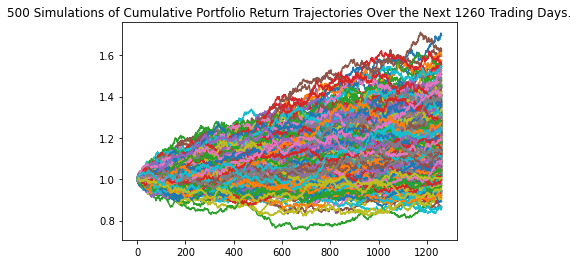

In [26]:
# Plot simulation outcomes
line_plot =MC_5_year.plot_simulation()

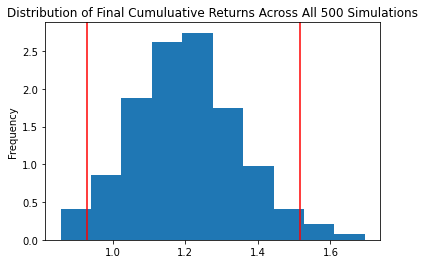

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.202273
std               0.145565
min               0.856322
25%               1.100622
50%               1.197687
75%               1.292270
max               1.695081
95% CI Lower      0.928556
95% CI Upper      1.517173
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $55713.36 and $91030.38


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.997817  0.998428  1.000816  1.000202  1.002120  0.998788  1.004226   
2     0.994703  0.996223  1.001987  0.998816  1.002372  0.996708  1.009074   
3     0.994115  0.993375  0.992622  1.001069  0.999700  1.000123  1.011610   
4     0.999040  0.997821  0.992272  0.999767  1.000459  1.006178  1.008906   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.164254  1.246948  1.441080  1.685210  1.702114  1.474774  1.535126   
2517  2.169555  1.246315  1.436260  1.685058  1.697652  1.479128  1.536203   
2518  2.169089  1.243387  1.426446  1.685480  1.714264  1.479079  1.537777   
2519  2.170695  1.238881  1.419187  1.670521  1.720418  1.478161  1.544292   
2520  2.166411  1.238568  1.422756  1.668923  1.720600  1.480128  1.538224   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.004250  1.001431  1.000740  ...  0.995519  1.001253  1.000492   
2     1.006986  1.006219  0.995591  ...  0.991815  1.001091  1.003774   
3     1.009254  1.012194  0.998619  ...  0.992699  1.003085  1.005997   
4     1.009897  1.014282  0.995619  ...  0.997683  1.007825  1.007858   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.288182  1.138653  1.500977  ...  1.367442  1.357662  1.661583   
2517  1.288485  1.144082  1.498097  ...  1.366833  1.360457  1.672969   
2518  1.289258  1.140795  1.496271  ...  1.368088  1.357853  1.662915   
2519  1.296500  1.137510  1.499085  ...  1.370125  1.359697  1.664317   
2520  1.292365  1.138481  1.501295  ...  1.368816  1.361692  1.666635   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.994026  1.006129  1.002356  1.005233  0.999769  1.002106  1.003746  
2     0.989341  1.007530  1.009809  1.007273  0.999666  1.006340  0.998303  
3     0.991536  1.004239  1.010765  1.009501  0.999652  1.011737  0.998762  
4     0.991188  1.009171  1.009303  1.008223  1.003270  1.014350  1.001691  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.348599  1.649220  1.782632  1.450872  1.701338  1.199957  1.171159  
2517  1.351751  1.646287  1.781356  1.459438  1.695322  1.197466  1.171882  
2518  1.354957  1.637911  1.781046  1.451367  1.695901  1.201111  1.172847  
2519  1.352170  1.633762  1.778638  1.443413  1.699061  1.191529  1.166331  
2520  1.349637  1.633255  1.781666  1.442561  1.699977  1.197157  1.165888  

[2521 rows x 500 columns]

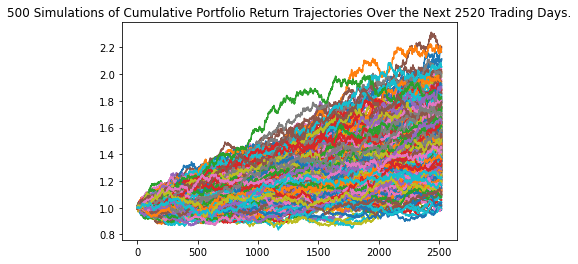

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

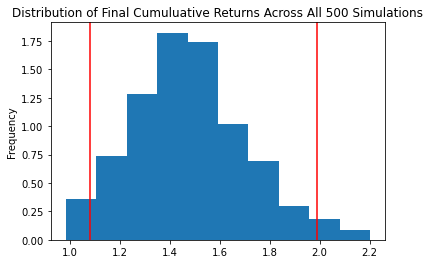

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.477364
std               0.230147
min               0.984413
25%               1.319127
50%               1.468676
75%               1.613270
max               2.202006
95% CI Lower      1.083048
95% CI Upper      1.990417
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $64982.9 and $119425.0
